## Genetic algorithm introduction

The code implements a genetic algorithm to evolve a random string into a target string (e.g., "genetics algo"). The algorithm follows these steps:

Initialize Population – Create a set of random strings.
Selection – Choose the fittest individuals.
Crossover – Combine parents to create new offspring.
Mutation – Introduce small random changes.
Evaluation – Check if an individual matches the target.
Regeneration – Replace weaker individuals with new ones.

## Flowchart of GA

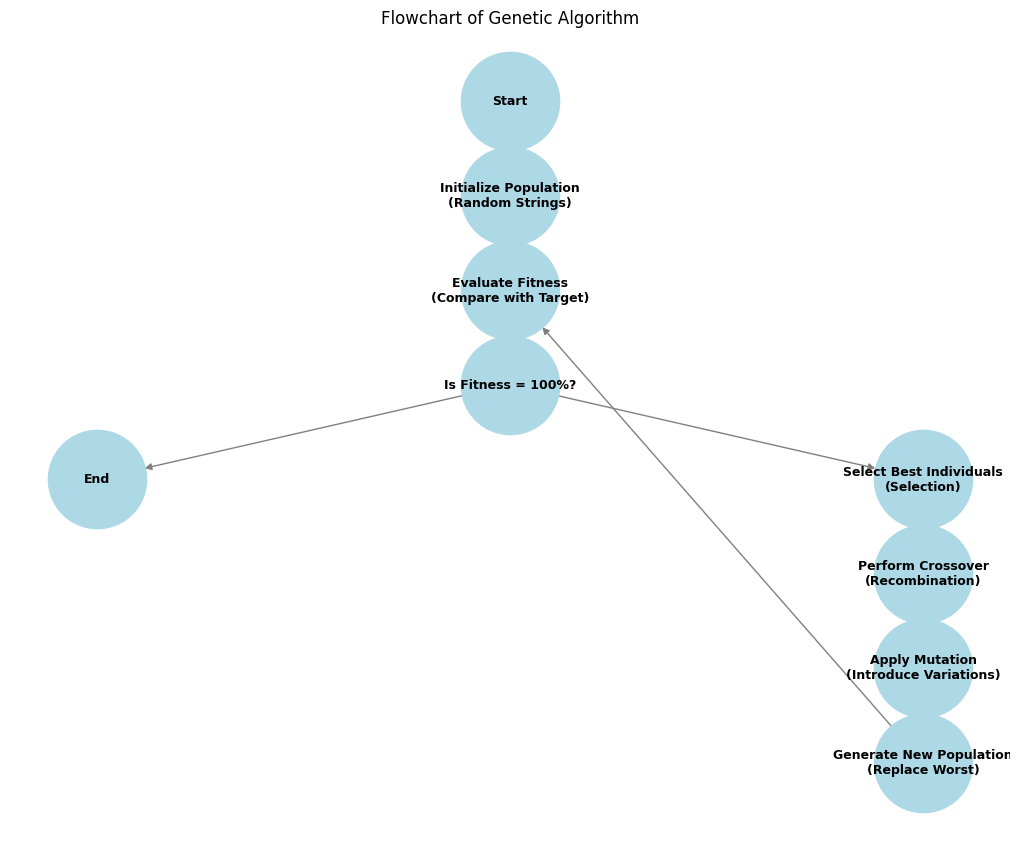

In [50]:
import matplotlib.pyplot as plt
import networkx as nx

# Steps and connections
edges = [
    ("Start", "Initialize Population\n(Random Strings)"),
    ("Initialize Population\n(Random Strings)", "Evaluate Fitness\n(Compare with Target)"),
    ("Evaluate Fitness\n(Compare with Target)", "Is Fitness = 100%?"),
    ("Is Fitness = 100%?", "End"),
    ("Is Fitness = 100%?", "Select Best Individuals\n(Selection)"),
    ("Select Best Individuals\n(Selection)", "Perform Crossover\n(Recombination)"),
    ("Perform Crossover\n(Recombination)", "Apply Mutation\n(Introduce Variations)"),
    ("Apply Mutation\n(Introduce Variations)", "Generate New Population\n(Replace Worst)"),
    ("Generate New Population\n(Replace Worst)", "Evaluate Fitness\n(Compare with Target)"),  # Loop back
]

# Create directed graph
G = nx.DiGraph()
G.add_edges_from(edges)

# Positions
pos = {
    "Start": (0, 8),
    "Initialize Population\n(Random Strings)": (0, 7),
    "Evaluate Fitness\n(Compare with Target)": (0, 6),
    "Is Fitness = 100%?": (0, 5),
    "End": (-1, 4),
    "Select Best Individuals\n(Selection)": (1, 4),
    "Perform Crossover\n(Recombination)": (1, 3),
    "Apply Mutation\n(Introduce Variations)": (1, 2),
    "Generate New Population\n(Replace Worst)": (1, 1),
}

plt.figure(figsize=(10, 8))
nx.draw(
    G, pos, with_labels=True, node_size=5000, node_color="lightblue",
    font_size=9, font_weight="bold", edge_color="gray", arrows=True
)

# Flowchart
plt.title("Flowchart of Genetic Algorithm")
plt.show()


## Initialize Population

What is Population?
A collection of randomly generated candidate solutions (strings). Each individual (string) has a fitness score that measures how close it is to the target.

In [51]:
import typing as t

def gen_initial_population(self) -> t.List[str]:
    return [self.gen_random_chromosome() for _ in range(self.population_size)]

In [52]:
def gen_random_chromosome(self) -> str:
    return "".join(random.choices(self.genes_alphabet, k=self.chromosome_length))

## Selection

What is Selection?
The process of choosing the best individuals from the population based on their fitness.

In [53]:
def get_fittest_individual(self, population: t.List[str]) -> str:
    return max(population, key=self.fitness_function)


## Crossover

What is Crossover?
Combining genes from two parents to create a new individual.

In [54]:
def crossover(self, parent_a: str, parent_b: str) -> str:
    crossover_point = self.gen_crossover_point()
    if crossover_point >= self.chromosome_length:
        crossover_point -= self.chromosome_length
        parent_a, parent_b = parent_b, parent_a
    return parent_a[0:crossover_point] + parent_b[crossover_point:]


## Mutation

In [55]:
def mutate(self, chromosome: str) -> str:
    return "".join([self.gen_random_gene()
                    if random.randint(1, self.gene_chance_of_mutation) == 1
                    else gene
                    for gene in chromosome])


In [56]:
def gen_random_gene(self) -> str:
    return random.choice(self.genes_alphabet)


## Evaluation

What is Evaluation?
Checks if an individual matches the target.

In [57]:
def make_chromosome_fitness_function(target_chromosome: str) -> t.Callable[[str], float]:
    def fitness_function(chromosome: str) -> float:
        score = len(target_chromosome) - hamming_distance(chromosome, target_chromosome)
        return score ** 10
    return fitness_function


In [58]:
def hamming_distance(a: str, b: str) -> int:
    return sum(1 if a[i] != b[i] else 0 for i in range(len(a)))

## Regeneration of Population

What is Regeneration?
Replaces the worst individuals with the best offspring.

In [59]:
def gen_new_generation(self, old_generation: t.List[str]) -> t.List[str]:
    population_fitness = self.compute_population_fitness(old_generation)
    fit_individuals_iter = iter(
        self.sample_individuals(
            population=old_generation,
            weights=population_fitness,
            sample_size=2 * self.population_size,
        )
    )
    new_generation = [self.mate(fit_individual, next(fit_individuals_iter))
                      for fit_individual in fit_individuals_iter]
    return new_generation


In [60]:
import functools
import random
import time
import typing as t

class NaturalSelectionExperiment:
    def __init__(self, population_size: int, genes_alphabet: str, chromosome_length: int,
                 fitness_function: t.Callable[[str], float], gene_chance_of_mutation: int,
                 max_stale_generations: int, verbose: bool = False) -> None:
        self.population_size = population_size
        self.genes_alphabet = genes_alphabet
        self.chromosome_length = chromosome_length
        self.fitness_function = functools.lru_cache(maxsize=131072)(fitness_function)
        self.gene_chance_of_mutation = gene_chance_of_mutation
        self.max_stale_generations = max_stale_generations
        self.verbose = verbose

    def run(self) -> str:
        start_time = time.time()
        population = self.gen_initial_population()
        best_individual = self.get_fittest_individual(population)
        best_score = self.fitness_function(best_individual)
        generations_since_best = 0
        generation_number = 1

        while generations_since_best < self.max_stale_generations:
            population = self.gen_new_generation(population)
            generation_number += 1
            generation_fittest = self.get_fittest_individual(population)
            generation_fittest_score = self.fitness_function(generation_fittest)

            if generation_fittest_score > best_score:
                best_individual = generation_fittest
                best_score = generation_fittest_score
                generations_since_best = 0
            else:
                generations_since_best += 1

        return best_individual

    def gen_initial_population(self) -> t.List[str]:
        return ["".join(random.choices(self.genes_alphabet, k=self.chromosome_length)) for _ in range(self.population_size)]

    def get_fittest_individual(self, population: t.List[str]) -> str:
        return max(population, key=self.fitness_function)

    def gen_new_generation(self, old_generation: t.List[str]) -> t.List[str]:
        population_fitness = [self.fitness_function(ind) for ind in old_generation]
        mating_pool = random.choices(old_generation, weights=population_fitness, k=2 * self.population_size)
        new_generation = [self.mate(mating_pool[i], mating_pool[i + 1]) for i in range(0, len(mating_pool), 2)]
        return new_generation

    def mate(self, parent_a: str, parent_b: str) -> str:
        crossover_point = random.randint(0, self.chromosome_length - 1)
        child = parent_a[:crossover_point] + parent_b[crossover_point:]
        return self.mutate(child)

    def mutate(self, chromosome: str) -> str:
        return "".join(g if random.randint(1, self.gene_chance_of_mutation) != 1 else random.choice(self.genes_alphabet) for g in chromosome)

def make_chromosome_fitness_function(target_chromosome: str) -> t.Callable[[str], float]:
    def fitness_function(chromosome: str) -> float:
        return sum(1 for a, b in zip(chromosome, target_chromosome) if a == b) ** 2
    return fitness_function


## Running the Algorithm

In [61]:
TARGET_STRING = "genetics algo"

experiment = NaturalSelectionExperiment(
    population_size=250,
    genes_alphabet="ABCDEFGHIJKLMNOPQRSTUVWXYZ abcdefghijklmnopqrstuvwxyz",
    chromosome_length=len(TARGET_STRING),
    fitness_function=make_chromosome_fitness_function(TARGET_STRING),
    gene_chance_of_mutation=5,
    max_stale_generations=1000,
    verbose=True,
)

solution = experiment.run()
print("Final solution:", solution)

Final solution: genetiHs algo
